In [8]:

import pandas as pd

# Load datasets
airlines = pd.read_csv('Data/airlines.csv', delimiter=';', quotechar='"', na_values='NA')
airports = pd.read_csv('Data/airports.csv', delimiter=';', quotechar='"', na_values='NA')
flights = pd.read_csv('Data/flights.csv', delimiter=';', quotechar='"', na_values='NA')
planes = pd.read_csv('Data/planes.csv', delimiter=';', quotechar='"', na_values='NA')
weather = pd.read_csv('Data/weather.csv', delimiter=';', quotechar='"', na_values='NA')

# Display basic information about the datasets
print("Airlines shape:", airlines.shape)
print("Airports shape:", airports.shape)
print("Flights shape:", flights.shape)
print("Planes shape:", planes.shape)
print("Weather shape:", weather.shape)


Airlines shape: (14, 3)
Airports shape: (1251, 9)
Flights shape: (435352, 20)
Planes shape: (4840, 10)
Weather shape: (26204, 16)


### Data Cleaning

In [9]:
def clean_airports(df):
    df = df.dropna()
    df['faa'] = df['faa'].astype(str)
    df['name'] = df['name'].astype(str)
    df['lat'] = df['lat'].astype(str).str.replace(',', '.').astype(float)
    df['lon'] = df['lon'].astype(str).str.replace(',', '.').astype(float)
    df['alt'] = df['alt'].astype(str).str.replace(',', '.').astype(float)
    df['tz'] = df['tz'].astype(int)
    df['dst'] = df['dst'].astype(str)
    df['tzone'] = df['tzone'].astype(str)
    return df


def clean_flights(df):
    df = df.dropna()
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int)
    df['dep_time'] = df['dep_time'].astype(int)
    df['sched_dep_time'] = df['sched_dep_time'].astype(int)
    df['dep_delay'] = df['dep_delay'].astype(int)
    df['arr_time'] = df['arr_time'].astype(int)
    df['sched_arr_time'] = df['sched_arr_time'].astype(int)
    df['arr_delay'] = df['arr_delay'].astype(int)
    df['carrier'] = df['carrier'].astype(str)
    df['flight'] = df['flight'].astype(int)
    df['tailnum'] = df['tailnum'].astype(str)
    df['origin'] = df['origin'].astype(str)
    df['dest'] = df['dest'].astype(str)
    df['air_time'] = df['air_time'].astype(str).str.replace(',', '.').astype(float)
    df['distance'] = df['distance'].astype(str).str.replace(',', '.').astype(float)
    df['hour'] = df['hour'].astype(int)
    df['minute'] = df['minute'].astype(int)
    df['time_hour'] = pd.to_datetime(df['time_hour'])  # Convert to datetime
    return df


def clean_planes(df):
    df = df.dropna()
    df['tailnum'] = df['tailnum'].astype(str)
    df['year'] = df['year'].astype(int)
    df['type'] = df['type'].astype(str)
    df['manufacturer'] = df['manufacturer'].astype(str)
    df['model'] = df['model'].astype(str)
    df['engines'] = df['engines'].astype(int)
    df['seats'] = df['seats'].astype(int)
    df['speed'] = df['speed'].astype(str).str.replace(',', '.').astype(float)
    df['engine'] = df['engine'].astype(str)
    return df


def clean_weather(df):
    # These columns are almost completely filled with NA.
    # The number of non-NA fields is too small to conclude anything, so we are dropping them
    df = df.drop(columns=['temp', 'dewp', 'humid', 'precip', 'pressure'])
    df = df.dropna()
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int)
    df['hour'] = df['hour'].astype(int)
    df['wind_dir'] = df['wind_dir'].astype(int)
    df['wind_speed'] = df['wind_speed'].astype(str).str.replace(',', '.').astype(float)
    df['wind_gust'] = df['wind_gust'].astype(str).str.replace(',', '.').astype(float)
    df['visib'] = df['visib'].astype(str).str.replace(',', '.').astype(float)
    df['time_hour'] = pd.to_datetime(df['time_hour'], errors='coerce')
    return df

In [10]:
# Apply cleaning functions
airports_cleaned = clean_airports(airports)
flights_cleaned = clean_flights(flights)
planes_cleaned = clean_planes(planes)
weather_cleaned = clean_weather(weather)

tables = {"Airports": (airports, airports_cleaned), "Flights": (flights, flights_cleaned),
          "Planes": (planes, planes_cleaned), "Weather": (weather, weather_cleaned)}
for name, table in tables.items():
    print(f"{name} before cleaning:")
    print(table[0].info(), end="\n")
    print(f"{name} after cleaning:")
    print(table[1].info(), end="\n")

/var/folders/qh/58h6bn7574l01yyrh7gtqf6w0000gs/T/ipykernel_10595/3058175835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['faa'] = df['faa'].astype(str)
/var/folders/qh/58h6bn7574l01yyrh7gtqf6w0000gs/T/ipykernel_10595/3058175835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].astype(str)
/var/folders/qh/58h6bn7574l01yyrh7gtqf6w0000gs/T/ipykernel_10595/3058175835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

Airports before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1251 non-null   int64  
 1   faa         1251 non-null   object 
 2   name        1251 non-null   object 
 3   lat         1251 non-null   object 
 4   lon         1251 non-null   object 
 5   alt         1251 non-null   int64  
 6   tz          1203 non-null   float64
 7   dst         1203 non-null   object 
 8   tzone       1132 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 88.1+ KB
None
Airports after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 1132 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1132 non-null   int64  
 1   faa         1132 non-null   object 
 2   name        1132 non-null   object 
 3   lat         1

### ExploratoryDataAnalysis(EDA)

In [11]:
%pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Summary for Airports:
         Unnamed: 0   faa                  name          lat          lon  \
count   1132.000000  1132                  1132  1132.000000  1132.000000   
unique          NaN  1132                  1129          NaN          NaN   
top             NaN   AAF  Capital City Airport          NaN          NaN   
freq            NaN     1                     3          NaN          NaN   
mean     625.319788   NaN                   NaN    41.187758  -104.025646   
std      358.631972   NaN                   NaN    10.445591    28.629499   
min        1.000000   NaN                   NaN    19.721399  -176.645996   
25%      316.750000   NaN                   NaN    34.114076  -118.409248   
50%      625.500000   NaN                   NaN    39.548199   -96.291199   
75%      932.250000   NaN                   NaN    44.554000   -82.918827   
max     1250.000000   NaN                   NaN    71.285402   174.113998   

                alt           tz   dst             tz

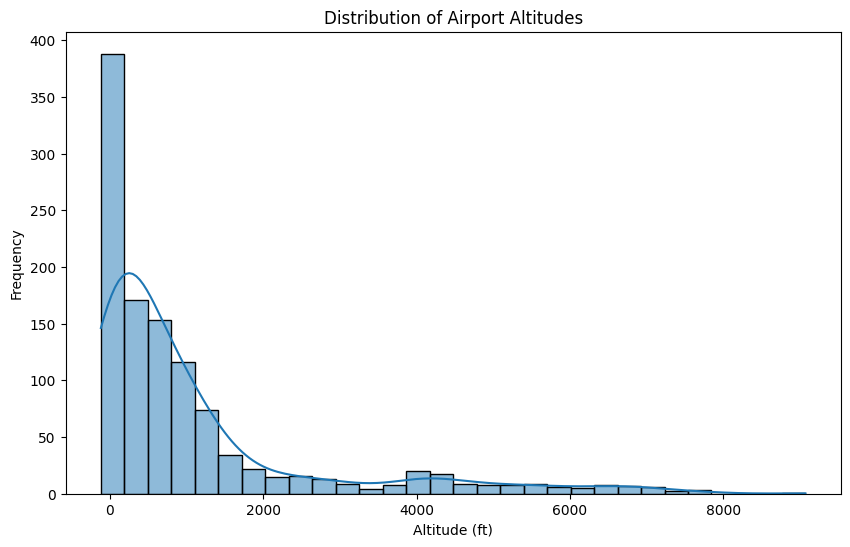

Summary for Flights:
           Unnamed: 0      year          month            day       dep_time  \
count   422818.000000  422818.0  422818.000000  422818.000000  422818.000000   
unique            NaN       NaN            NaN            NaN            NaN   
top               NaN       NaN            NaN            NaN            NaN   
freq              NaN       NaN            NaN            NaN            NaN   
mean    217820.664917    2023.0       6.428752      15.703208    1365.157765   
min          1.000000    2023.0       1.000000       1.000000       1.000000   
25%     107584.250000    2023.0       3.000000       8.000000     930.000000   
50%     215652.500000    2023.0       6.000000      16.000000    1356.000000   
75%     329012.750000    2023.0       9.000000      23.000000    1804.000000   
max     435352.000000    2023.0      12.000000      31.000000    2400.000000   
std     126635.078137       0.0       3.439978       8.765872     498.209070   

        sched_dep_

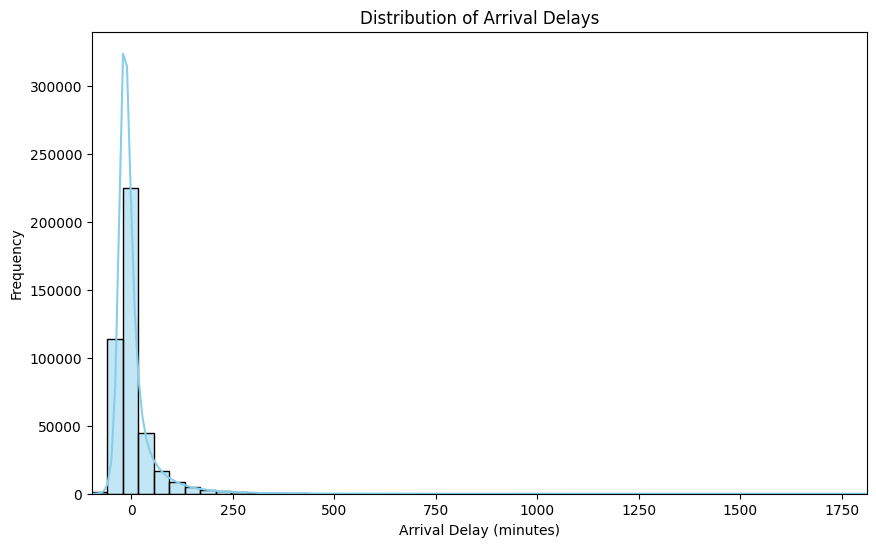

/var/folders/qh/58h6bn7574l01yyrh7gtqf6w0000gs/T/ipykernel_10595/2115213417.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=flights_cleaned, x='month', y='arr_delay', palette='coolwarm')


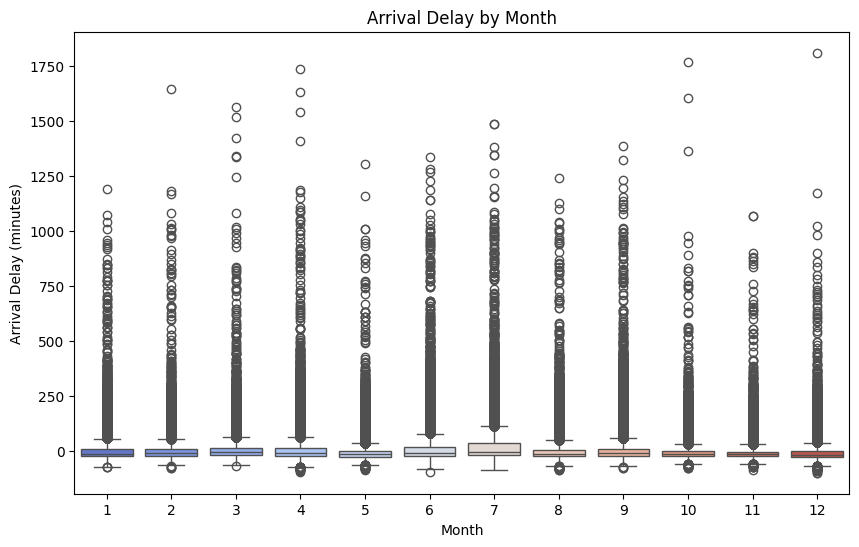

Summary for Planes:
         Unnamed: 0 tailnum         year                     type  \
count   4751.000000    4751  4751.000000                     4751   
unique          NaN    4751          NaN                        3   
top             NaN  N101DQ          NaN  Fixed wing multi engine   
freq            NaN       1          NaN                     4749   
mean    2421.870764     NaN  2010.158072                      NaN   
std     1395.576397     NaN     8.370654                      NaN   
min        1.000000     NaN  1990.000000                      NaN   
25%     1215.500000     NaN  2002.000000                      NaN   
50%     2415.000000     NaN  2012.000000                      NaN   
75%     3634.500000     NaN  2017.000000                      NaN   
max     4840.000000     NaN  2023.000000                      NaN   

       manufacturer  model      engines        seats   speed     engine  
count          4751   4751  4751.000000  4751.000000  4751.0       4751  
uni

/var/folders/qh/58h6bn7574l01yyrh7gtqf6w0000gs/T/ipykernel_10595/2115213417.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=planes_cleaned, x='engines', palette='viridis')


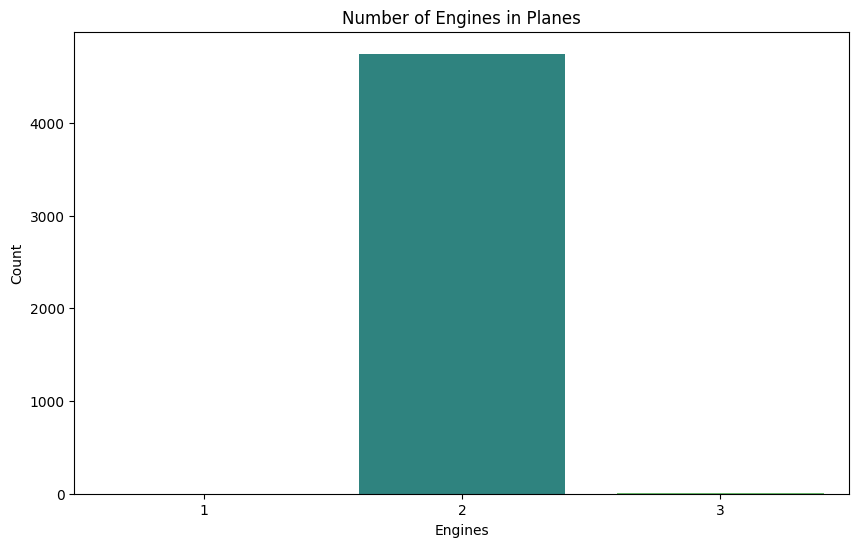

Summary for Weather:
          Unnamed: 0 origin     year         month           day  \
count   24974.000000  24974  24974.0  24974.000000  24974.000000   
unique           NaN      3      NaN           NaN           NaN   
top              NaN    LGA      NaN           NaN           NaN   
freq             NaN   8415      NaN           NaN           NaN   
mean    12999.916954    NaN   2023.0      6.491151     15.623168   
min         1.000000    NaN   2023.0      1.000000      1.000000   
25%      6473.250000    NaN   2023.0      4.000000      8.000000   
50%     12980.500000    NaN   2023.0      7.000000     16.000000   
75%     19469.750000    NaN   2023.0      9.000000     23.000000   
max     26204.000000    NaN   2023.0     12.000000     31.000000   
std      7546.491207    NaN      0.0      3.446065      8.777624   

                hour      wind_dir    wind_speed     wind_gust         visib  \
count   24974.000000  24974.000000  24974.000000  24974.000000  24974.000000   
un

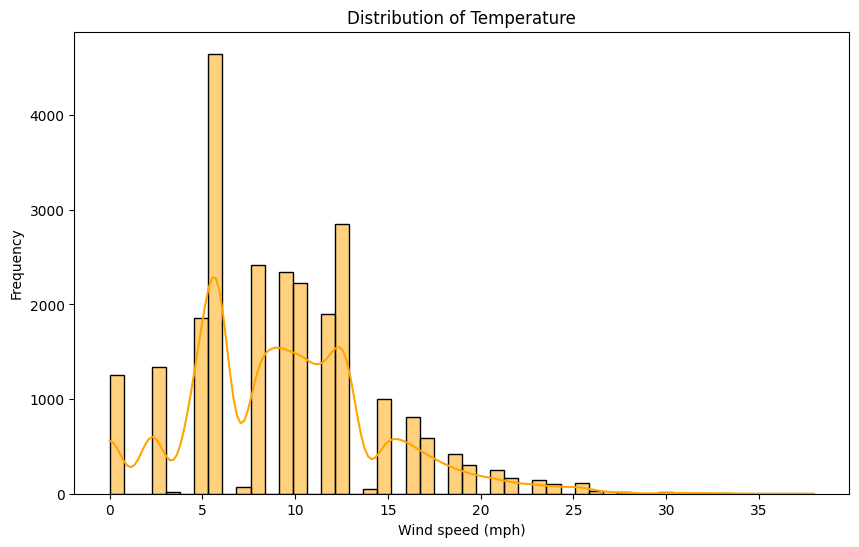

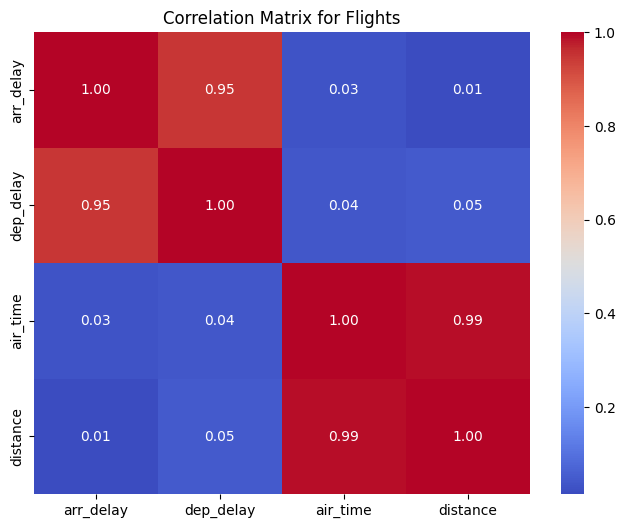

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Summarize Datasets
def dataset_summary(df, name):
    print(f"Summary for {name}:")
    print(df.describe(include='all'))
    print(f"\nMissing values in {name}:\n{df.isnull().sum()}\n")
    print("-" * 50)


# Airports Dataset EDA
dataset_summary(airports_cleaned, "Airports")
plt.figure(figsize=(10, 6))
sns.histplot(airports_cleaned['alt'], kde=True, bins=30)
plt.title("Distribution of Airport Altitudes")
plt.xlabel("Altitude (ft)")
plt.ylabel("Frequency")
plt.show()

# Flights Dataset EDA
dataset_summary(flights_cleaned, "Flights")
plt.figure(figsize=(10, 6))
sns.histplot(flights_cleaned['arr_delay'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.xlim(flights_cleaned['arr_delay'].min(), flights_cleaned['arr_delay'].max())
plt.show()

# Explore delay trends by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=flights_cleaned, x='month', y='arr_delay', palette='coolwarm')
plt.title("Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

# Planes Dataset EDA
dataset_summary(planes_cleaned, "Planes")
plt.figure(figsize=(10, 6))
sns.countplot(data=planes_cleaned, x='engines', palette='viridis')
plt.title("Number of Engines in Planes")
plt.xlabel("Engines")
plt.ylabel("Count")
plt.show()

# Weather Dataset EDA
dataset_summary(weather_cleaned, "Weather")
plt.figure(figsize=(10, 6))
sns.histplot(weather_cleaned['wind_speed'], kde=True, bins=50, color='orange')
plt.title("Distribution of Temperature")
plt.xlabel("Wind speed (mph)")
plt.ylabel("Frequency")
plt.show()

# Correlation Analysis for Flights
corr = flights_cleaned[['arr_delay', 'dep_delay', 'air_time', 'distance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Flights")
plt.show()

In [18]:
df = flights_cleaned.copy()


# Features and target
X = weather_cleaned[['wind_dir', 'wind_speed', 'wind_gust', 'visib']]
y = weather_cleaned['month']

In [15]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 9.2 MB/s eta 0:00:011     |█████████████▎                  | 12.6 MB 11.2 MB/s eta 0:00:02
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline: Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

/Users/nikita_edu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/nikita_edu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nikita_edu/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nikita_e

Logistic Regression Results:
              precision    recall  f1-score   support

           1       0.09      0.13      0.11       409
           2       0.00      0.00      0.00       386
           3       0.16      0.33      0.21       425
           4       0.19      0.12      0.15       445
           5       0.00      0.00      0.00       400
           6       0.15      0.02      0.04       438
           7       0.13      0.25      0.17       444
           8       0.14      0.39      0.21       407
           9       0.19      0.18      0.18       377
          10       0.00      0.00      0.00       461
          11       0.12      0.21      0.15       355
          12       0.25      0.10      0.15       448

    accuracy                           0.14      4995
   macro avg       0.12      0.14      0.11      4995
weighted avg       0.12      0.14      0.11      4995

Accuracy: 0.14314314314314314

Random Forest Results:
              precision    recall  f1-score   supp